In [4]:
import pandas as pd
df = pd.read_csv('imdb.zip')
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(df.review)

In [6]:
x.shape

(1000, 3047)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, df.sentiment.values, test_size=0.2, random_state=1235)

In [8]:
import tensorflow as tf

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [11]:
model.fit(x_train.A, y_train, epochs=200, validation_data=(x_test.A, y_test))

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 0.6680 - accuracy: 0.6012 - val_loss: 0.6410 - val_accuracy: 0.7200
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.9262 - val_loss: 0.5973 - val_accuracy: 0.7300
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.9413 - val_loss: 0.5642 - val_accuracy: 0.7500
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.9588 - val_loss: 0.5492 - val_accuracy: 0.7400
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.9650 - val_loss: 0.5323 - val_accuracy: 0.7600
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2763 - accuracy: 0.9737 - val_loss: 0.5245 - val_accuracy: 0.7600
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.9787 - val_loss: 0.5164 - val_accuracy: 0.7650
Epoch 8/200
2

Epoch 57/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9987 - val_loss: 0.5441 - val_accuracy: 0.7550
Epoch 58/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9987 - val_loss: 0.5466 - val_accuracy: 0.7550
Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9987 - val_loss: 0.5477 - val_accuracy: 0.7550
Epoch 60/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9987 - val_loss: 0.5502 - val_accuracy: 0.7550
Epoch 61/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9987 - val_loss: 0.5508 - val_accuracy: 0.7550
Epoch 62/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9987 - val_loss: 0.5533 - val_accuracy: 0.7550
Epoch 63/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0262 - accuracy: 0.9987 - val_loss: 0.5557 - val_accuracy: 0.7550
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.7328 - val_accuracy: 0.7600
Epoch 172/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.7338 - val_accuracy: 0.7600
Epoch 173/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.7365 - val_accuracy: 0.7600
Epoch 174/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.7383 - val_accuracy: 0.7600
Epoch 175/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.7394 - val_accuracy: 0.7600
Epoch 176/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.7404 - val_accuracy: 0.7550
Epoch 177/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.7420 - val_accuracy: 0.7550
Epoch 178/200

In [12]:
prob = model.predict(x_test.A)

In [32]:
import numpy as np
y_pred = np.where(prob > 0.7, 1, 0)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test, y_pred)

array([[91, 20],
       [30, 59]], dtype=int64)

In [35]:
from sklearn.metrics import *

In [36]:
accuracy_score(y_test, y_pred)

0.75

In [37]:
precision_score(y_test, y_pred, pos_label=1) 
#pos_label을 0으로 하면 음성라벨의 precision 을 알 수 있다.

0.7468354430379747

In [38]:
recall_score(y_test, y_pred, pos_label=1)

0.6629213483146067

In [39]:
f1_score(y_test, y_pred)

0.7023809523809523

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [41]:
fpr, tpr, threshold = roc_curve(y_test, prob)

- fpr: False Positive Ratio =FP(위양성)/음성 = 1 - 특이도(실제 음성 중에 얼마나 틀렸는가?)\
- tpr: True Positive Ratio =TP(진양성)/양성 = 재현도(recall) = 민감도(sensitivity)(실제 양성 중에 얼마나 맞았는가?)\

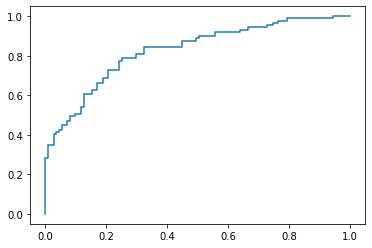

In [42]:
plt.plot(fpr, tpr)

In [43]:
roc_auc_score(y_test, prob)

0.8261969835003543

In [45]:
ww = pd.DataFrame({
    'word': cv.get_feature_names(),
    'weight': model.trainable_weights[0].numpy().flat
})

In [46]:
ww.sort_values('weight', ascending=False).head()

,word,weight
1181,great,6.061161
1715,miss,4.984640
1405,interesting,4.855148
1796,nice,4.801769
907,excellent,4.686910


In [47]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(1, 
                                 activation='sigmoid', 
                                 kernel_regularizer=tf.keras.regularizers.l1_l2(0.01, 0.02)))

In [48]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [49]:
model2.fit(x_train.A, y_train, epochs=200, validation_data=(x_test.A, y_test))

Epoch 1/200
25/25 [==============================] - 0s 5ms/step - loss: 0.8860 - accuracy: 0.5663 - val_loss: 0.7852 - val_accuracy: 0.5300
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7570 - accuracy: 0.6363 - val_loss: 0.7528 - val_accuracy: 0.5900
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7420 - accuracy: 0.6363 - val_loss: 0.7515 - val_accuracy: 0.5700
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7417 - accuracy: 0.6250 - val_loss: 0.7488 - val_accuracy: 0.6400
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7436 - accuracy: 0.6450 - val_loss: 0.7561 - val_accuracy: 0.5750
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7425 - accuracy: 0.6263 - val_loss: 0.7523 - val_accuracy: 0.5950
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7427 - accuracy: 0.6162 - val_loss: 0.7518 - val_accuracy: 0.6350
Epoch 8/200
2

Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7426 - accuracy: 0.6263 - val_loss: 0.7536 - val_accuracy: 0.6300
Epoch 60/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7447 - accuracy: 0.6263 - val_loss: 0.7497 - val_accuracy: 0.6150
Epoch 61/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7428 - accuracy: 0.6187 - val_loss: 0.7493 - val_accuracy: 0.6100
Epoch 62/200
25/25 [==============================] - 0s 1ms/step - loss: 0.7442 - accuracy: 0.6300 - val_loss: 0.7543 - val_accuracy: 0.6150
Epoch 63/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7443 - accuracy: 0.6225 - val_loss: 0.7570 - val_accuracy: 0.6050
Epoch 64/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7440 - accuracy: 0.6137 - val_loss: 0.7515 - val_accuracy: 0.6050
Epoch 65/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7438 - accuracy: 0.6200 - val_loss: 0.7549 - val_accuracy: 0.6350
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 0.7431 - accuracy: 0.6250 - val_loss: 0.7508 - val_accuracy: 0.6250
Epoch 174/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7430 - accuracy: 0.6275 - val_loss: 0.7508 - val_accuracy: 0.5900
Epoch 175/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7432 - accuracy: 0.6275 - val_loss: 0.7520 - val_accuracy: 0.6150
Epoch 176/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7433 - accuracy: 0.6350 - val_loss: 0.7518 - val_accuracy: 0.6300
Epoch 177/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7434 - accuracy: 0.6175 - val_loss: 0.7522 - val_accuracy: 0.6150
Epoch 178/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7420 - accuracy: 0.6150 - val_loss: 0.7541 - val_accuracy: 0.6200
Epoch 179/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7425 - accuracy: 0.6350 - val_loss: 0.7496 - val_accuracy: 0.6350
Epoch 180/200

In [50]:
ww2 = pd.DataFrame({
    'word': cv.get_feature_names(),
    'weight': model2.trainable_weights[0].numpy().flat
})

In [51]:
ww2.sort_values('weight', ascending=False).head()

,word,weight
125,and,0.200231
1008,film,0.143872
1181,great,0.058538
1428,it,0.053930
1163,good,0.044173
